### HW1 (FCB 4.7)  
Mixture models : After a posterior analysis on data from a population of squash plants, it was determined that the total vegetable weight of a given plant could be modeled with the following distribution:
$p(y|\theta, \sigma^2) = 0.31dnorm(y, \theta, \sigma) + 0.46dnorm(2\theta_1, 2\sigma) + 0.23dnorm(y, 3\theta_1, 3\sigma)$
where the posterior distributions of the parameters have been calculated as $\frac{1}{\sigma^2} \sim gamma(10, 2.5), \theta|\sigma^2 \sim normal(4.1, \sigma^2/20)$

In [50]:
import numpy as np
import pandas as pd
from scipy.stats import norm, gamma

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### (a) Sample at least 5000 y values from the posterior predictive distribution

(array([  2.,   2.,   4.,   4.,   4.,   7.,   7.,  11.,  10.,  23.,  25.,
         38.,  56.,  64.,  59.,  91., 120., 152., 185., 220., 210., 244.,
        250., 303., 307., 308., 335., 317., 261., 231., 199., 193., 171.,
        124.,  94.,  90.,  68.,  49.,  35.,  34.,  25.,  17.,  17.,  11.,
          3.,   6.,   3.,   6.,   3.,   2.]),
 array([-1.37751811, -1.01202338, -0.64652866, -0.28103393,  0.0844608 ,
         0.44995552,  0.81545025,  1.18094498,  1.5464397 ,  1.91193443,
         2.27742916,  2.64292389,  3.00841861,  3.37391334,  3.73940807,
         4.10490279,  4.47039752,  4.83589225,  5.20138697,  5.5668817 ,
         5.93237643,  6.29787116,  6.66336588,  7.02886061,  7.39435534,
         7.75985006,  8.12534479,  8.49083952,  8.85633424,  9.22182897,
         9.5873237 ,  9.95281843, 10.31831315, 10.68380788, 11.04930261,
        11.41479733, 11.78029206, 12.14578679, 12.51128151, 12.87677624,
        13.24227097, 13.60776569, 13.97326042, 14.33875515, 14.70424988,
 

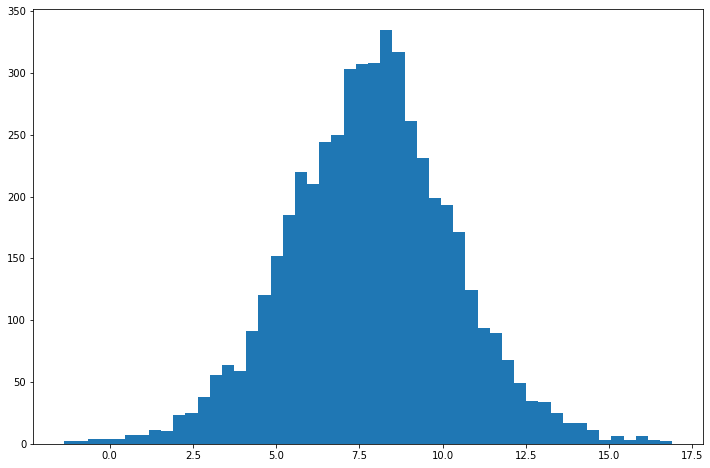

In [45]:
N = 5000
# sample sigma^2
sigma2_mc = gamma.rvs(a=10, scale=1/2.5, size=N)
sigma_mc = np.sqrt(sigma2_mc)

# sample theta
theta_mc = []
for i in range(N):
    theta = norm.rvs(loc=4.1, scale = np.sqrt((sigma_mc[i])/20), size=1)
    theta_mc = np.append(theta_mc, theta)
    
# plug in to posterior distribution to sample y
ynew_mc = []
for i in range(N):
    ynew_mc = np.append(ynew_mc,
                   0.31 * norm.rvs(loc = theta_mc[i], scale = sigma_mc[i], size = 1) + 
                   0.46 * norm.rvs(loc = 2 * theta_mc[i], scale = 2 * sigma_mc[i], size = 1) +
                   0.23 * norm.rvs(loc = 3 * theta_mc[i], scale = 3 * sigma_mc[i], size = 1))

# plot histogram
plt.figure(figsize=(12, 8))
plt.hist(ynew_mc, bins=50)

#### (b) Form a 75% quantile-based C.I. for a new value of Y

In [48]:
ci_low = np.quantile(ynew_mc, 0.125)
ci_high = np.quantile(ynew_mc, 0.875)
(ci_low, ci_high)

(5.062913242643829, 10.59401267046394)

#### (c) Form a 75% HPD region for a new Y as follows

### HW2

In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
P = np.array([[0.5, 0.5, 0, 0, 0, 0],
              [0.1, 0.5, 0.4, 0, 0, 0],
              [0, 0.2, 0.5, 0.3, 0, 0],
              [0, 0, 0.3, 0.5, 0.2, 0],
              [0, 0, 0, 0.4, 0.5, 0.1],
              [0, 0, 0, 0, 0.5, 0.5]])

#### (a) Find transition probability matrix M

In [13]:
M = np.array([[1/2,1/2,0,0,0,0],
              [1/10,1/2,2/5,0,0,0],
              [0,1/5,1/2,3/10,0,0],
              [0,0,3/10,1/2,1/5,0],
              [0,0,0,2/5,1/2,1/10],
              [0,0,0,0,1/2,1/2]])
print(M)

[[0.5 0.5 0.  0.  0.  0. ]
 [0.1 0.5 0.4 0.  0.  0. ]
 [0.  0.2 0.5 0.3 0.  0. ]
 [0.  0.  0.3 0.5 0.2 0. ]
 [0.  0.  0.  0.4 0.5 0.1]
 [0.  0.  0.  0.  0.5 0.5]]


#### (b) Calculate M^10, M^50, M^100 and check if each entry converges to somewhere

In [14]:
# M^10
Mlim = M
for i in range(10):
    Mlim = Mlim.dot(M)
print(Mlim)

[[0.04581862 0.19763594 0.33704986 0.28341519 0.11713152 0.01894886]
 [0.03952719 0.18063857 0.32815787 0.29593513 0.13231494 0.0234263 ]
 [0.03370499 0.16407894 0.31832745 0.30757955 0.14796756 0.02834152]
 [0.02834152 0.14796756 0.30757955 0.31832745 0.16407894 0.03370499]
 [0.0234263  0.13231494 0.29593513 0.32815787 0.18063857 0.03952719]
 [0.01894886 0.11713152 0.28341519 0.33704986 0.19763594 0.04581862]]


In [15]:
# M^50
Mlim = M
for i in range(50):
    Mlim = Mlim.dot(M)
print(Mlim)

[[0.03125178 0.15625535 0.31250357 0.31249643 0.15624465 0.03124822]
 [0.03125107 0.15625321 0.31250214 0.31249786 0.15624679 0.03124893]
 [0.03125036 0.15625107 0.31250071 0.31249929 0.15624893 0.03124964]
 [0.03124964 0.15624893 0.31249929 0.31250071 0.15625107 0.03125036]
 [0.03124893 0.15624679 0.31249786 0.31250214 0.15625321 0.03125107]
 [0.03124822 0.15624465 0.31249643 0.31250357 0.15625535 0.03125178]]


In [16]:
# M^100
Mlim = M
for i in range(100):
    Mlim = Mlim.dot(M)
print(Mlim)

[[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]]


#### (c) Check for all x, P(# of fleas on Mac at (t=100) = x) is hardly affected by '# of fleas on Mac at t=0'  
모든 row의 probability distribution이 동일하게 수렴! 즉 starting state i가 어디냐에 관계없이 많은 timestamp가 지났을 때 j에 있을 확률은 아래와 같이 수렴한다. 그래프로도 볼 수 있음

In [17]:
# Convergence?
Mlim

array([[0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125]])

[[0.5 0.5 0.  0.  0.  0. ]] 1
[[0.3 0.5 0.2 0.  0.  0. ]] 2
[[0.2  0.44 0.3  0.06 0.   0.  ]] 3
[[0.144 0.38  0.344 0.12  0.012 0.   ]] 4
[[0.11   0.3308 0.36   0.168  0.03   0.0012]] 5
[[0.08808 0.2924  0.36272 0.204   0.0492  0.0036 ]] 6
[[0.07328  0.262784 0.35952  0.230496 0.0672   0.00672 ]] 7
[[0.0629184 0.239936  0.3540224 0.249984  0.0830592 0.01008  ]] 8
[[0.0554528  0.22223168 0.3479808  0.2644224  0.0965664  0.01334592]] 9
[[0.04994957 0.2084384  0.34220979 0.275232   0.10784064 0.0163296 ]] 10
[[0.04581862 0.19763594 0.33704986 0.28341519 0.11713152 0.01894886]] 11
[[0.04267291 0.18913725 0.33260386 0.28967516 0.12472323 0.02118758]] 12
[[0.04025018 0.18242585 0.32885938 0.29450803 0.13089044 0.02306612]] 13
[[0.03836767 0.17710989 0.32575244 0.29826801 0.13587988 0.0246221 ]] 14
[[0.03689483 0.17288927 0.32320058 0.30121169 0.13990459 0.02589904]] 15
[[0.03573634 0.16953216 0.32111951 0.30352786 0.14314415 0.02693998]] 16
[[0.03482139 0.16685815 0.31943098 0.30535744 0.145

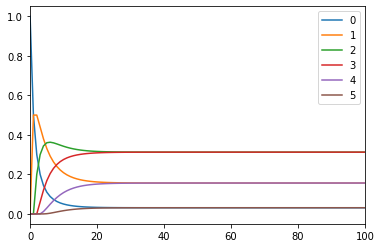

In [3]:
# initial state가 0 일때
state=np.array([[1, 0, 0, 0, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1));
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

[[0.  0.2 0.5 0.3 0.  0. ]] 1
[[0.02 0.2  0.42 0.3  0.06 0.  ]] 2
[[0.03  0.194 0.38  0.3   0.09  0.006]] 3
[[0.0344 0.188  0.3576 0.3    0.108  0.012 ]] 4
[[0.036   0.18272 0.344   0.30048 0.12    0.0168 ]] 5
[[0.036272 0.17816  0.335232 0.30144  0.128496 0.0204  ]] 6
[[0.035952  0.1742624 0.329312  0.302688  0.134736  0.0230496]] 7
[[0.03540224 0.1709696  0.32516736 0.304032   0.1394304  0.0249984 ]] 8
[[0.03479808 0.16821939 0.32218112 0.30533837 0.1430208  0.02644224]] 9
[[0.03422098 0.16594496 0.31997983 0.30653184 0.14579919 0.0275232 ]] 10
[[0.03370499 0.16407894 0.31832745 0.30757955 0.14796756 0.02834152]] 11
[[0.03326039 0.16255745 0.31706916 0.30847503 0.14967045 0.02896752]] 12
[[0.03288594 0.16132275 0.31610007 0.30922645 0.15101399 0.0294508 ]] 13
[[0.03257524 0.16032436 0.31534707 0.30984884 0.15207769 0.0298268 ]] 14
[[0.03232006 0.15951922 0.31475793 0.31035962 0.15292201 0.03012117]] 15
[[0.03211195 0.15887122 0.31429454 0.31077599 0.15359351 0.03035279]] 16
[[0.03194

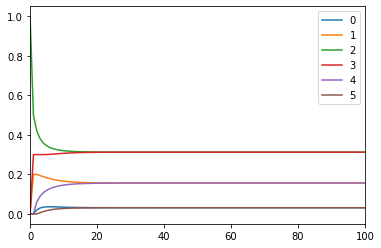

In [4]:
# initial state가 2일 때
state=np.array([[0, 0, 1, 0, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1))
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

#### (d) Let T = 50000, and consider Wt as a sampling of distribution D. Check how D looks like and compare D with X~Binom(5, 0.5)  
두 히스토그램이 거의 겹치는 걸 확인할 수 있다.

{0: 1632, 1: 7964, 2: 15564, 3: 15426, 4: 7901, 5: 1514}


<IPython.core.display.Javascript object>


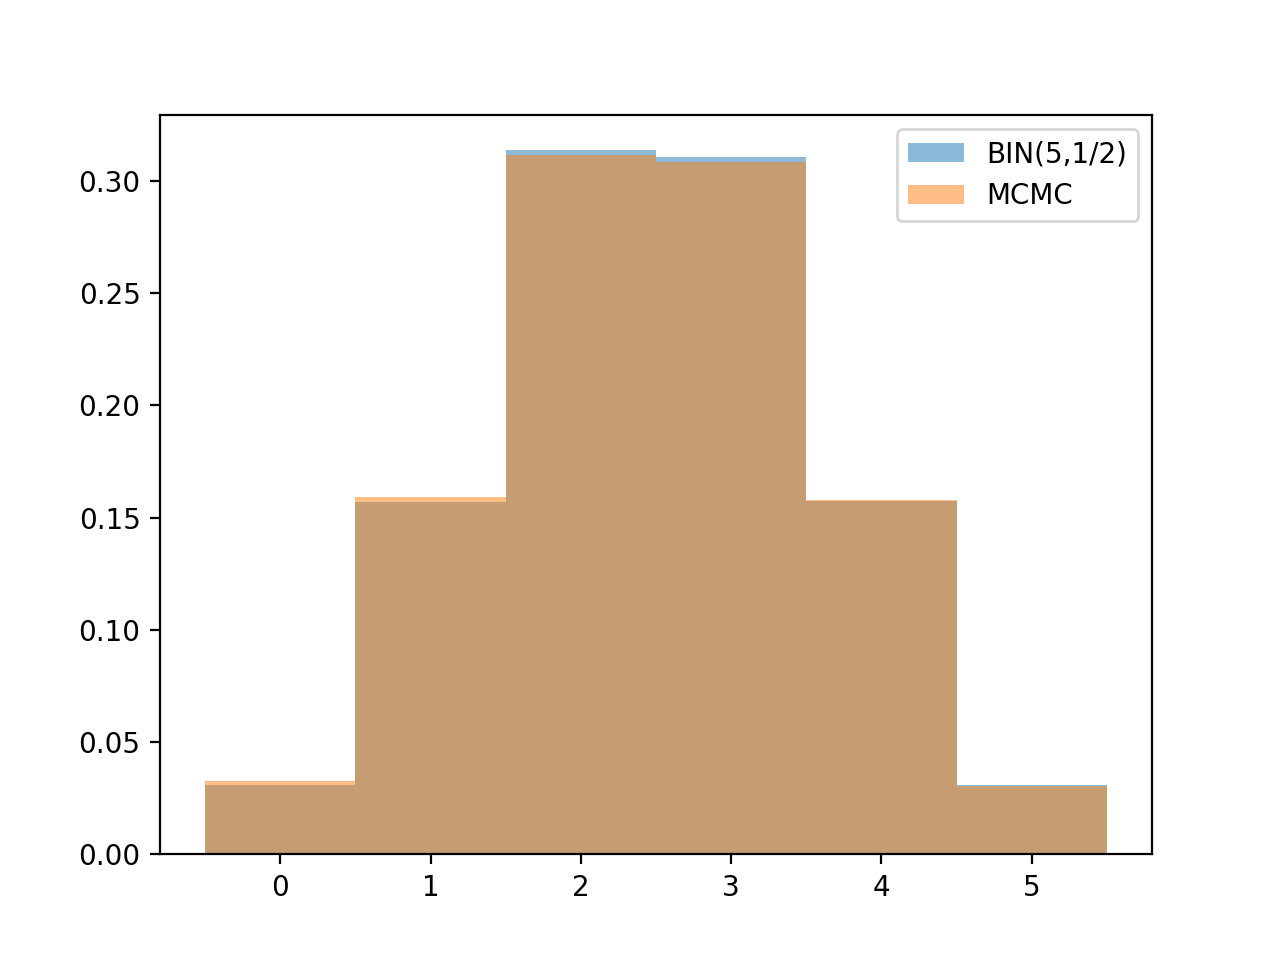

In [18]:
np.random.seed(1)
chain=0
chainHist=chain
for i in range(50000):
    pb=P[chain]
    pb=np.array(pb).flatten()
    chain=np.random.choice(6,1,p=pb)
    chainHist=np.append(chainHist,chain)

count={}
for i in chainHist:
    try: count[i] += 1
    except: count[i]=1
print(count)
plt.figure()

# sampling from binomial distribution
bi=np.random.binomial(5, 0.5, 50000)

plt.hist(bi,bins=np.linspace(-0.5,5.5,7), alpha=0.5, density=True, label='BIN(5,1/2)')
plt.hist(chainHist, bins=np.linspace(-0.5,5.5,7),alpha=0.5, density=True, label='MCMC')
plt.legend()
plt.show()

#### (e) 

<IPython.core.display.Javascript object>


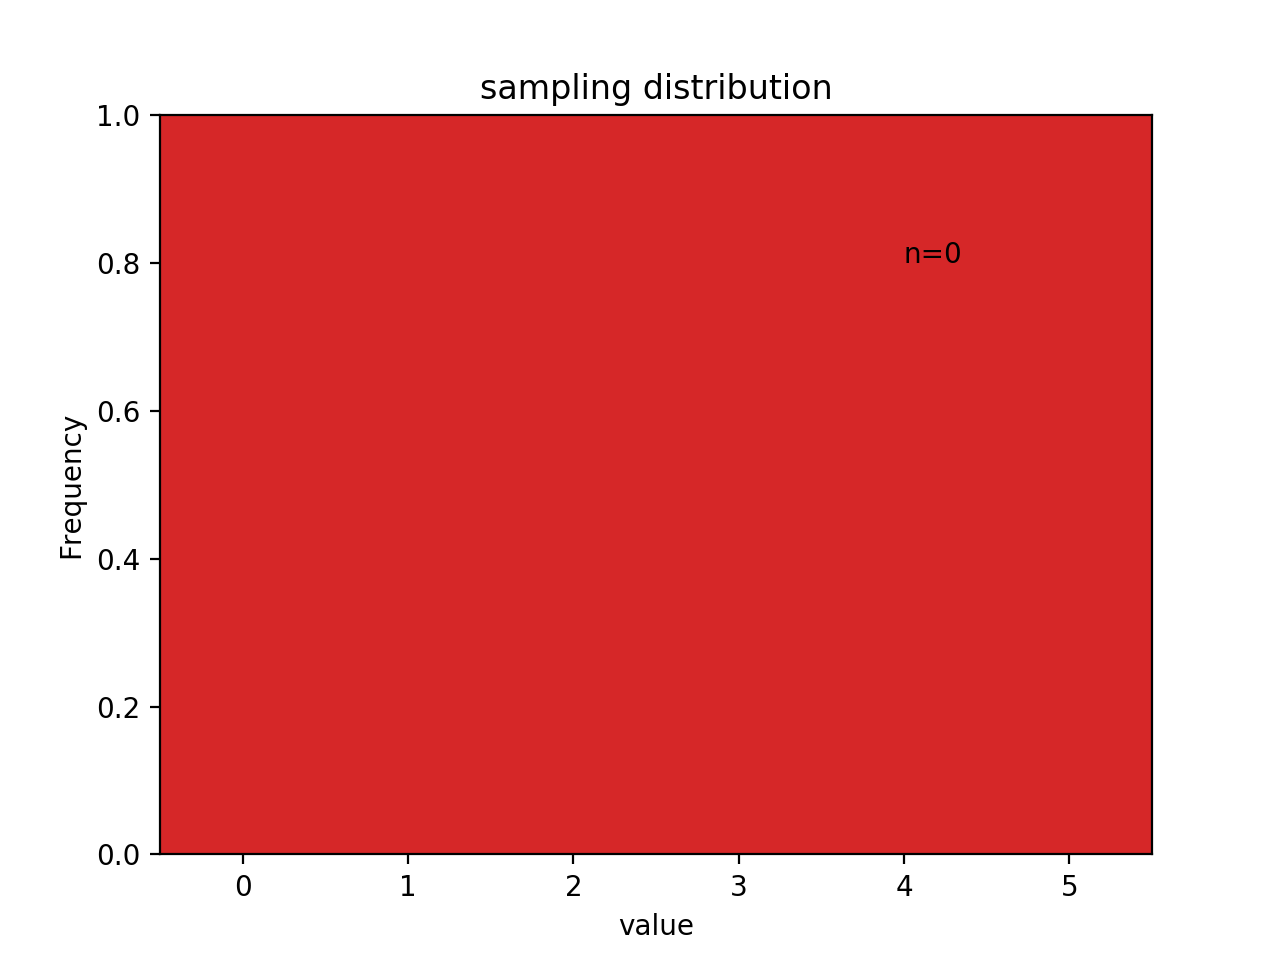

In [21]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def update(curr):
    if curr == 1000:
        a.event_source.stop()
    plt.cla()
    plt.hist(chainHist[:curr], bins=np.linspace(-0.5,5.5,7), density=True)
    plt.axis([-0.5,5.5, 0, 1])
    plt.gca().set_title('sampling distribution')
    plt.gca().set_ylabel('ratio')
    plt.gca().set_xlabel('value')
    plt.gca().annotate('n={}'.format(curr), [4,0.8])


fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 0.1)

plt.show()

In [10]:
distpd=[count.get(0)*1/50000, count.get(1)*1/50000, count.get(2)*1/50000, count.get(3)*1/50000, count.get(4)*1/50000, count.get(5)*1/50000]

In [22]:
print(stateHist[100])
# Binom(5, 0.5)
# (5C0(1/2)^5, 5C1(1/2)^5, 5C2(1/2)^5, 5C3(1/2)^5, 5C4(1/2)^5, 5C5(1/2)^5)
print([0.03125, 0.15625, 0.3125,  0.3125,  0.15625, 0.03125])
print(distpd)

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]
[0.03264, 0.15928, 0.31128, 0.30852, 0.15802, 0.03028]
